# Limpieza de datos con Python

In [2]:
# Importar librerias
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para graficar
import seaborn as sns # Para graficar
import numpy as np # Para manejo de datos numéricos
from colorama import Fore # Para colores en terminal

In [3]:
# Ruta del archivo CSV
ruta_archivo = "../data/raw/Adidas US Sales.csv"

df = pd.read_csv(ruta_archivo)

## 1. Inspección Inicial

In [4]:
# Inspección inicial del dataset
print(Fore.BLUE + "Inspección inicial del dataset:" + Fore.RESET)
print(Fore.GREEN + f"El dataset cuenta con {df.shape[0]} filas y {df.shape[1]} columnas" + Fore.RESET)

Inspección inicial del dataset:
El dataset cuenta con 9637 filas y 13 columnas


In [5]:
# Primeras cinco filas del dataset
print(Fore.BLUE + "Primeras cinco filas del dataset:" + Fore.RESET)
df.head()

Primeras cinco filas del dataset:


,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,1,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online
1,2,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet
2,3,West Gear,1128299,2021-01-19,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online
4,5,Sports Direct,1197831,2021-09-14,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet


In [6]:
# Información general del dataset
print(Fore.BLUE + "Información general del dataset:" + Fore.RESET)
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_id          9637 non-null   int64 
 1   retailer          9637 non-null   object
 2   retailer_id       9637 non-null   int64 
 3   invoice_date      9637 non-null   object
 4   region            9637 non-null   object
 5   state             9637 non-null   object
 6   city              9637 non-null   object
 7   product           9637 non-null   object
 8   price_per_unit    9637 non-null   int64 
 9   units_sold        9637 non-null   int64 
 10  total_sales       9637 non-null   int64 
 11  operating_profit  9637 non-null   int64 
 12  sales_method      9637 non-null   object
dtypes: int64(6), object(7)
memory usage: 978.9+ KB


### Interpretación:

- Podemos concluir que no hay nulos en nuestro dataset.
- La columna invoice_date tiene un tipo de dato (Dtype) incorrecto.

In [7]:
# Descripción estadística del dataset
print(Fore.BLUE + "Descripción estadística del dataset:" + Fore.RESET)
df.describe()

Descripción estadística del dataset:


,sales_id,retailer_id,price_per_unit,units_sold,total_sales,operating_profit
count,9637.000000,9.637000e+03,9637.000000,9637.000000,9637.000000,9637.000000
mean,4819.000000,1.173846e+06,45.218948,256.886064,12451.621355,3440.706029
std,2782.106606,2.636304e+04,14.704520,214.097600,12708.094249,5418.210200
min,1.000000,1.128299e+06,7.000000,6.000000,160.000000,8.000000
25%,2410.000000,1.185732e+06,35.000000,106.000000,4068.000000,192.000000
50%,4819.000000,1.185732e+06,45.000000,176.000000,7805.000000,437.000000
75%,7228.000000,1.185732e+06,55.000000,350.000000,15834.000000,5200.000000
max,9637.000000,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000


### Interpretación:

- En este caso estamos viendo solo las estadísticas generales pero para las columnas con tipo de dato (Dtype) Numérico.
- Podemos ver las estadísticas como:
    - Count - Cantidad de Filas -> Incluido los nombres de las columnas
    - mean - Media o promedio
    - std - Desviación Estandar 
    - min - Valor Mínimo
    - 25% - Q1 - Quartil 1
    - 50% - Mediana - Quartil 2 - Q2
    - 75% - Q3 - Quartil 3
    - max - Valor Máximo


## 2. Manejo de valores nulos

In [8]:
# Ver valores nulos
print(Fore.BLUE + "Valores nulos en las columnas del dataset:" + Fore.RESET)
print(df.isnull().sum())

Valores nulos en las columnas del dataset:
sales_id            0
retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64


### Interpretación:
- No hay valores nulos en ninguna de las columnas.

## 3. Eliminación de duplicados

In [9]:
print(Fore.BLUE + "Valores únicos en cada columna:" + Fore.RESET)
# Ver valores únicos en cada columna
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()} valores únicos")
# Verificar si hay duplicados
print(Fore.BLUE + "¿Existen filas duplicadas en el dataset?" + Fore.RESET)
print(df.duplicated().any())

Valores únicos en cada columna:
sales_id: 9637 valores únicos
retailer: 6 valores únicos
retailer_id: 4 valores únicos
invoice_date: 724 valores únicos
region: 5 valores únicos
state: 50 valores únicos
city: 52 valores únicos
product: 6 valores únicos
price_per_unit: 94 valores únicos
units_sold: 360 valores únicos
total_sales: 3081 valores únicos
operating_profit: 1529 valores únicos
sales_method: 3 valores únicos
¿Existen filas duplicadas en el dataset?
False


### Interpretación:
- No hay duplicados en el dataset

## 4. Conversión de tipos de datos

In [10]:
# Revisar tipos de datos
print(Fore.BLUE + "Tipos de datos en cada columna:" + Fore.RESET)
print(df.dtypes)
# Convertir columnas a tipos de datos adecuados
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')  # Convertir a tipo fecha

Tipos de datos en cada columna:
sales_id             int64
retailer            object
retailer_id          int64
invoice_date        object
region              object
state               object
city                object
product             object
price_per_unit       int64
units_sold           int64
total_sales          int64
operating_profit     int64
sales_method        object
dtype: object


In [11]:
# Verificar si la conversión fue exitosa
print(Fore.BLUE + "Tipos de datos después de la conversión:" + Fore.RESET)
print(df.dtypes)

Tipos de datos después de la conversión:
sales_id                     int64
retailer                    object
retailer_id                  int64
invoice_date        datetime64[ns]
region                      object
state                       object
city                        object
product                     object
price_per_unit               int64
units_sold                   int64
total_sales                  int64
operating_profit             int64
sales_method                object
dtype: object


## 5. Detección y tratamiento de Outliers

In [12]:
# Identificar columnas numéricas para detectar outliers
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_numericas

['sales_id',
 'retailer_id',
 'price_per_unit',
 'units_sold',
 'total_sales',
 'operating_profit']

In [13]:
# Identificar outliers en la columna 'price_per_unit'
def detectar_outliers(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
outliers_price_per_unit = detectar_outliers('price_per_unit')
# Lista de todos los outliers en price_per_unit
print(Fore.BLUE + "Outliers en la columna 'price_per_unit':" + Fore.RESET)
outliers_price_per_unit

Outliers en la columna 'price_per_unit':


,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online
9,10,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103,163,16789,806,Online
150,151,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Men's Street Footwear,86,270,23220,1231,Online
395,396,West Gear,1128299,2021-08-17,South,Louisiana,New Orleans,Men's Street Footwear,86,255,21930,1118,Online
836,837,Walmart,1128299,2021-07-16,Southeast,Florida,Orlando,Men's Athletic Footwear,88,225,19800,792,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,8320,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Men's Apparel,95,450,42750,8550,In-store
8391,8392,West Gear,1128299,2020-07-29,West,Washington,Seattle,Men's Apparel,90,425,38250,9563,In-store
8424,8425,Foot Locker,1128299,2021-06-24,Southeast,Virginia,Richmond,Men's Apparel,90,400,36000,14400,In-store
8451,8452,Sports Direct,1128299,2021-12-09,West,Hawaii,Honolulu,Men's Apparel,90,425,38250,5738,Outlet


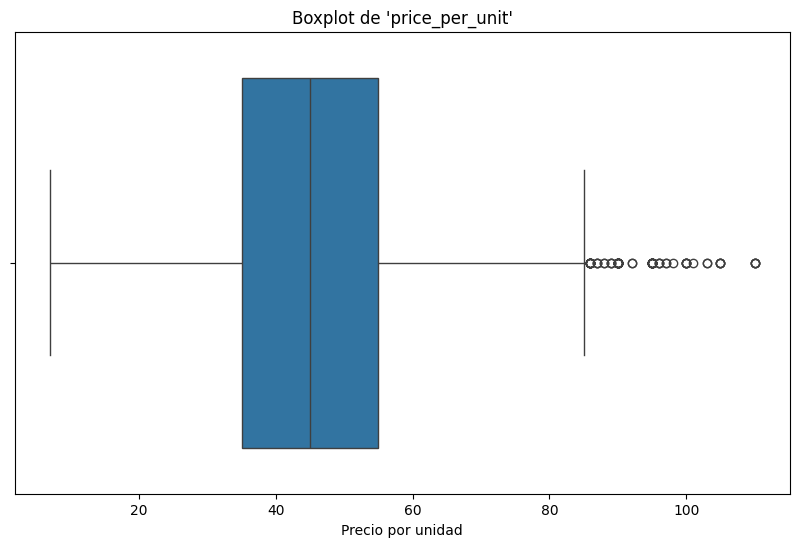

In [14]:
# Visualización de outliers en la columna 'price_per_unit'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_unit'])
plt.title("Boxplot de 'price_per_unit'")
plt.xlabel("Precio por unidad")
plt.show()

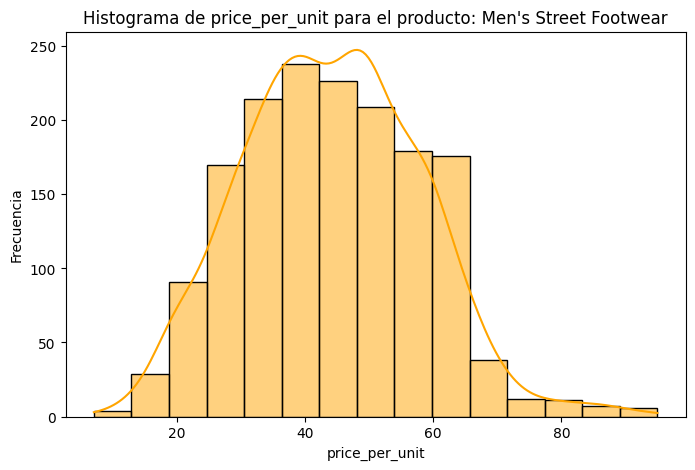

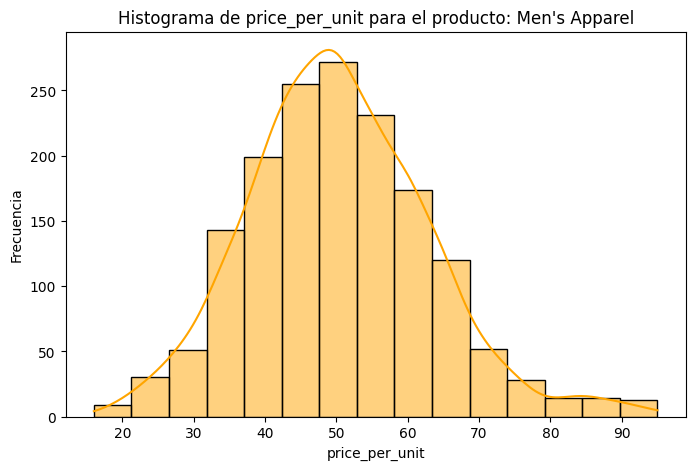

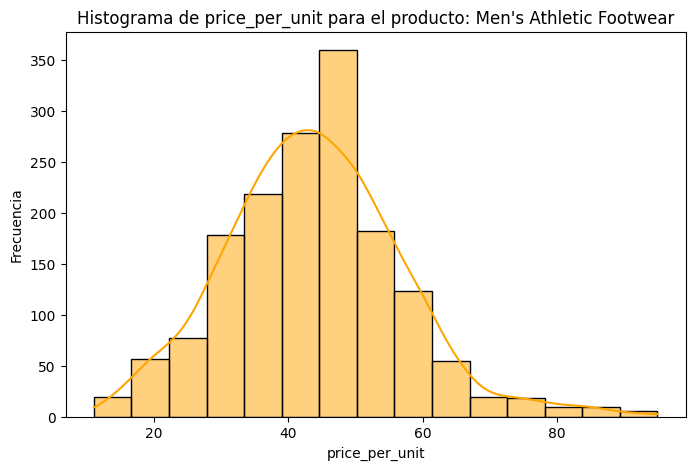

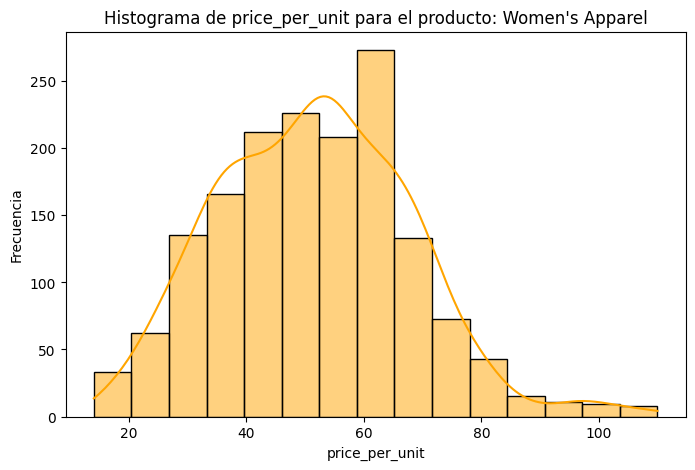

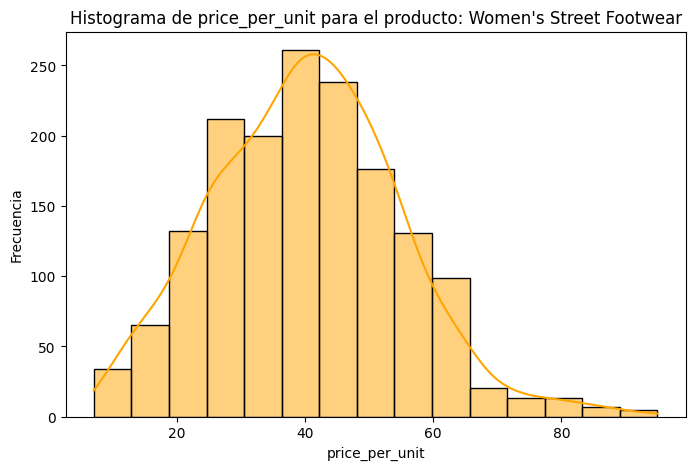

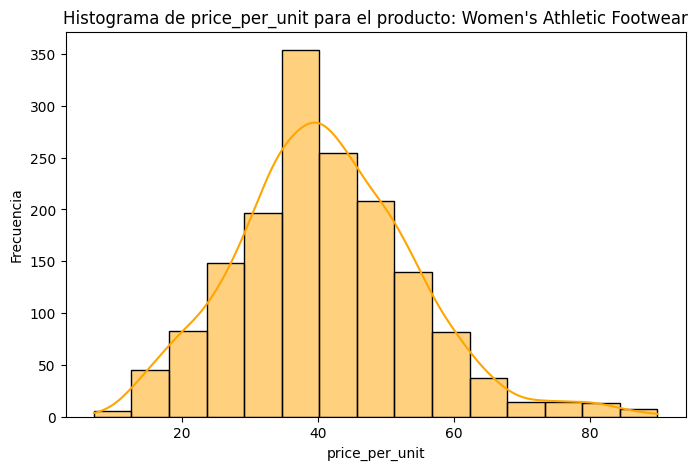

In [18]:
# Crear un histograma donde se representen los precios por unidad 'price_per_unit' y agruparlo por 'product'
products = df['product'].unique()

for product in products:
    subset = df[df['product'] == product]
    plt.figure(figsize=(8, 5))
    sns.histplot(subset['price_per_unit'], bins=15, kde=True, color='orange')
    plt.title(f'Histograma de price_per_unit para el producto: {product}')
    plt.xlabel('price_per_unit')
    plt.ylabel('Frecuencia')
    plt.show()

### Interpretación:
- Se puede ver que hay outliers en la columna `Price per Unit`, pero no se considera como outliers.

In [ ]:
# Identificar outliers en 'units_sold'
# Identificar outliers en la columna 'units_sold'
def detectar_outliers(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
outliers_units_sold = detectar_outliers('units_sold')
# Lista de todos los outliers en unit_sold
print(Fore.BLUE + "Outliers en la columna 'units_sold':" + Fore.RESET)
outliers_units_sold

Outliers en la columna 'units_sold':


,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
6329,6330,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,60,925,55500,16650,Outlet
6333,6334,Foot Locker,1185732,2020-03-31,Northeast,New York,New York,Women's Athletic Footwear,50,925,46250,16188,Outlet
6337,6338,Walmart,1185732,2020-04-21,Northeast,New York,New York,Women's Street Footwear,50,925,46250,16188,Outlet
6341,6342,Walmart,1197831,2020-08-12,South,Texas,Houston,Men's Street Footwear,30,925,27750,9713,Outlet
6345,6346,Walmart,1197831,2020-08-13,South,Texas,Houston,Men's Athletic Footwear,40,925,37000,12950,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,7117,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Apparel,70,725,50750,17763,Online
7117,7118,Sports Direct,1185732,2021-01-06,Southeast,South Carolina,Charleston,Men's Athletic Footwear,35,725,25375,8881,Online
7119,7120,Sports Direct,1185732,2021-01-06,Southeast,South Carolina,Charleston,Women's Street Footwear,25,725,18125,7250,Online
7121,7122,Sports Direct,1185732,2021-01-06,Southeast,South Carolina,Charleston,Women's Apparel,35,725,25375,12688,Online


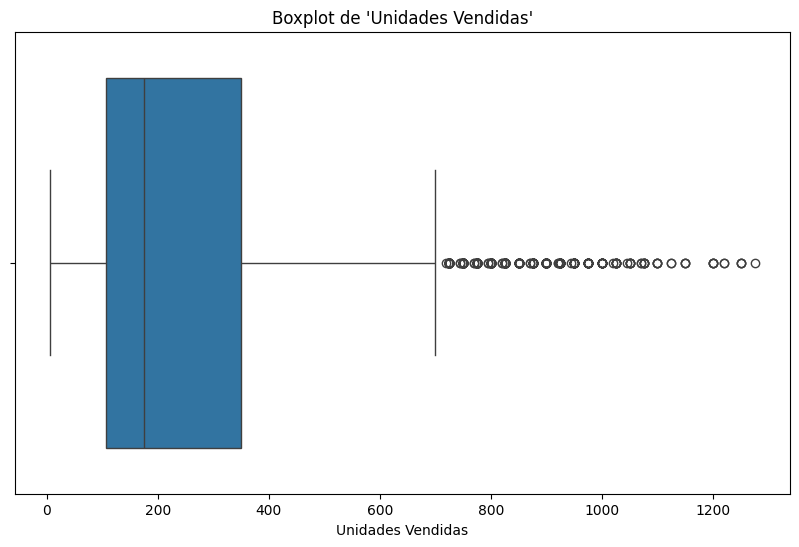

In [24]:
# Visualización de outliers en la columna 'units_sold'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['units_sold'])
plt.title("Boxplot de 'Unidades Vendidas'")
plt.xlabel("Unidades Vendidas")
plt.show()

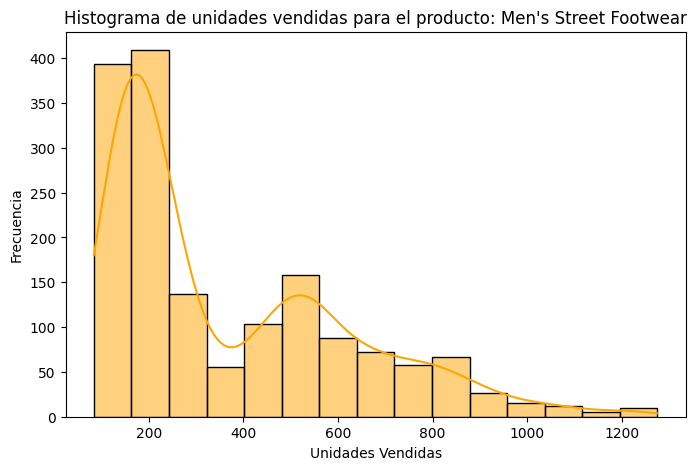

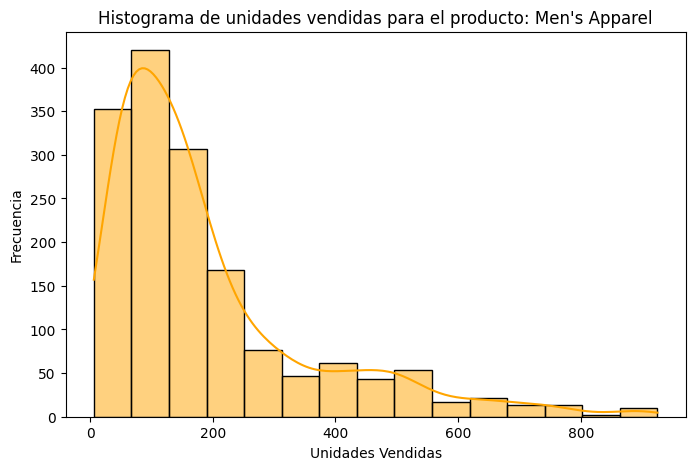

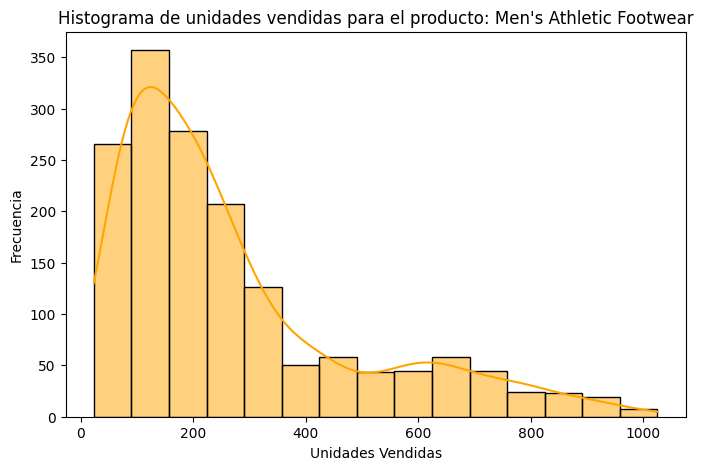

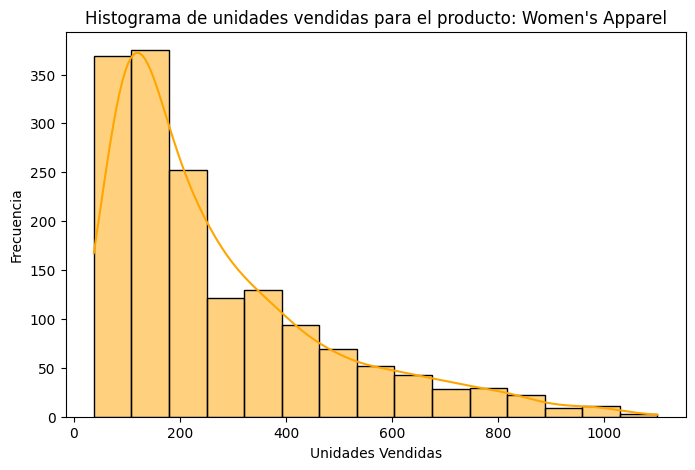

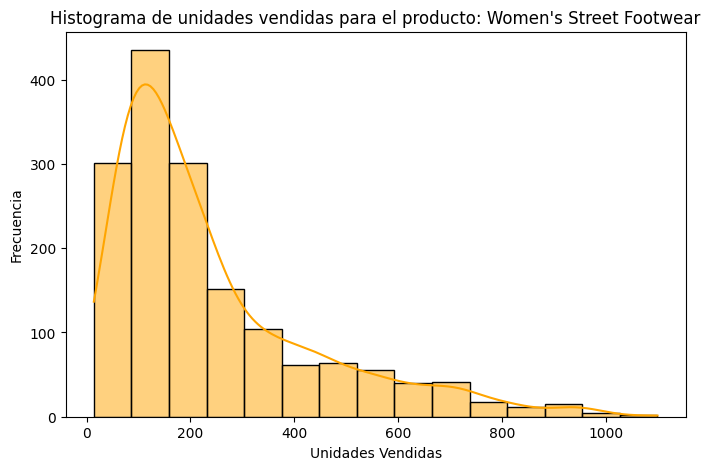

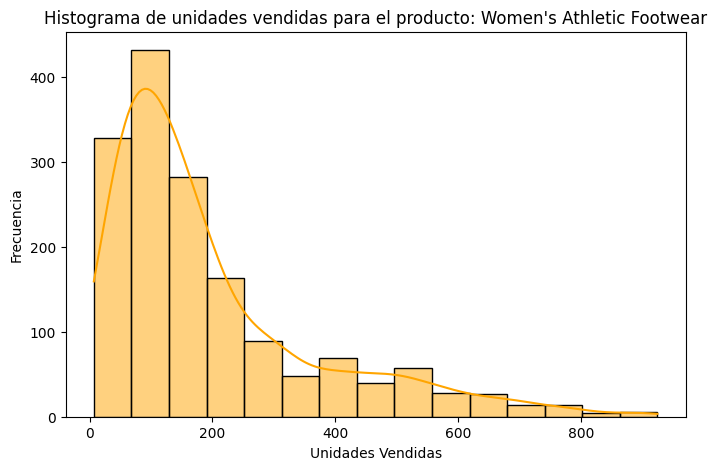

In [ ]:
# Crear un histograma donde se representen los precios por unidad 'units_sold' y agruparlo por 'product'
products = df['product'].unique()

for product in products:
    subset = df[df['product'] == product]
    plt.figure(figsize=(8, 5))
    sns.histplot(subset['units_sold'], bins=15, kde=True, color='orange')
    plt.title(f'Histograma de unidades vendidas para el producto: {product}')
    plt.xlabel('Unidades Vendidas')
    plt.ylabel('Frecuencia')
    plt.show()

### Interpretación:
- Se puede ver que hay outliers en la columna `Units Sold`, pero no se considera como outliers.

In [25]:
# Identificar outliers en 'total_sales'
# Identificar outliers en la columna 'total_sales'
def detectar_outliers(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
outliers_units_sold = detectar_outliers('total_sales')
# Lista de todos los outliers en total_sales
print(Fore.BLUE + "Outliers en la columna 'total_sales':" + Fore.RESET)
outliers_units_sold

Outliers en la columna 'total_sales':


,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
6329,6330,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,60,925,55500,16650,Outlet
6333,6334,Foot Locker,1185732,2020-03-31,Northeast,New York,New York,Women's Athletic Footwear,50,925,46250,16188,Outlet
6337,6338,Walmart,1185732,2020-04-21,Northeast,New York,New York,Women's Street Footwear,50,925,46250,16188,Outlet
6345,6346,Walmart,1197831,2020-08-13,South,Texas,Houston,Men's Athletic Footwear,40,925,37000,12950,Outlet
6349,6350,Walmart,1197831,2020-08-30,South,Texas,Houston,Men's Street Footwear,40,925,37000,12950,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,8390,West Gear,1128299,2020-07-17,West,Washington,Seattle,Men's Apparel,80,425,34000,8500,In-store
8391,8392,West Gear,1128299,2020-07-29,West,Washington,Seattle,Men's Apparel,90,425,38250,9563,In-store
8424,8425,Foot Locker,1128299,2021-06-24,Southeast,Virginia,Richmond,Men's Apparel,90,400,36000,14400,In-store
8451,8452,Sports Direct,1128299,2021-12-09,West,Hawaii,Honolulu,Men's Apparel,90,425,38250,5738,Outlet


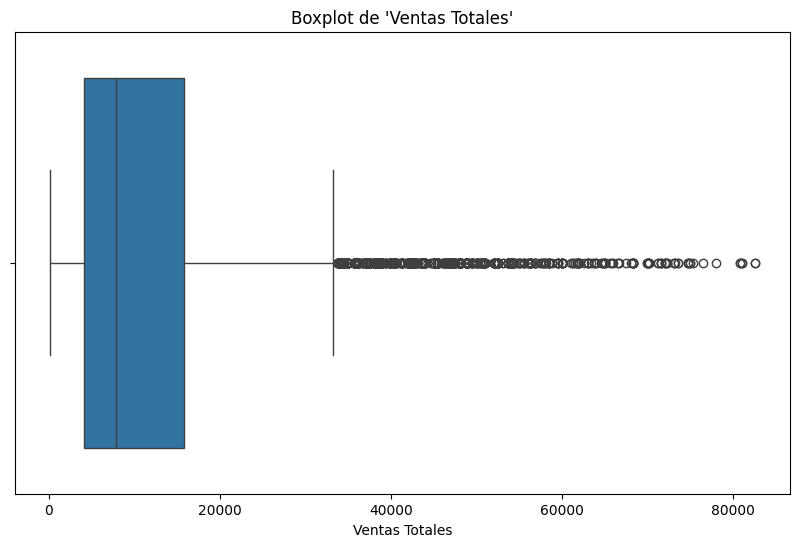

In [28]:
# Visualización de outliers en la columna 'total_sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_sales'])
plt.title("Boxplot de 'Ventas Totales'")
plt.xlabel("Ventas Totales")
plt.show()

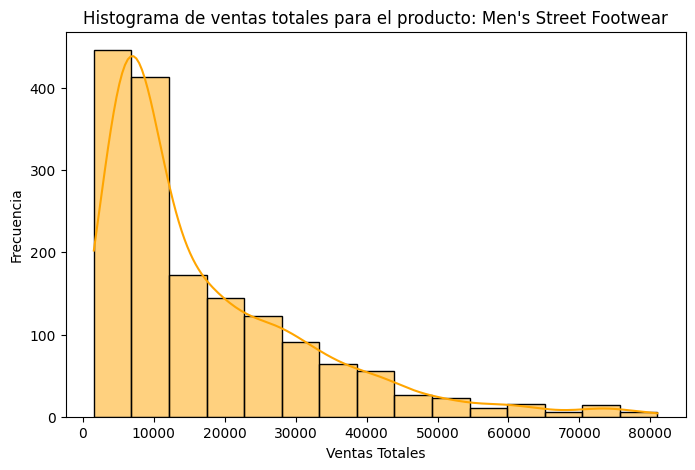

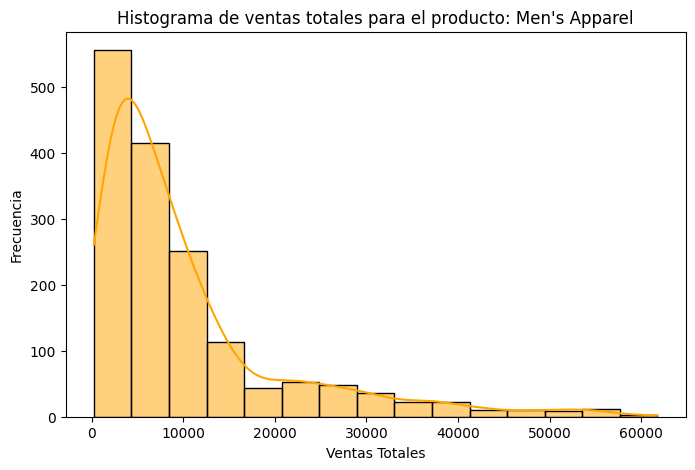

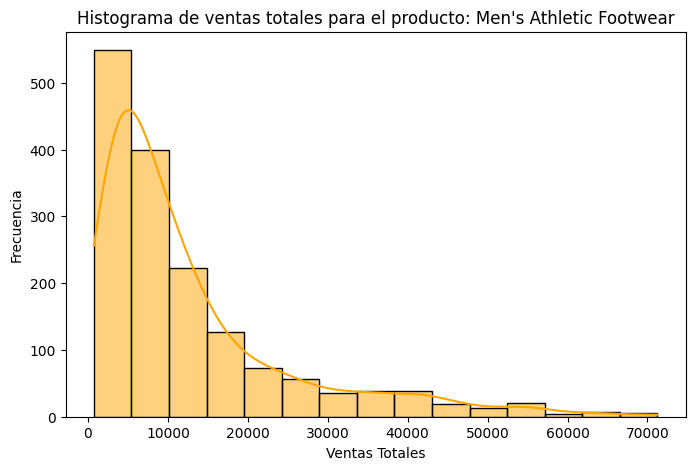

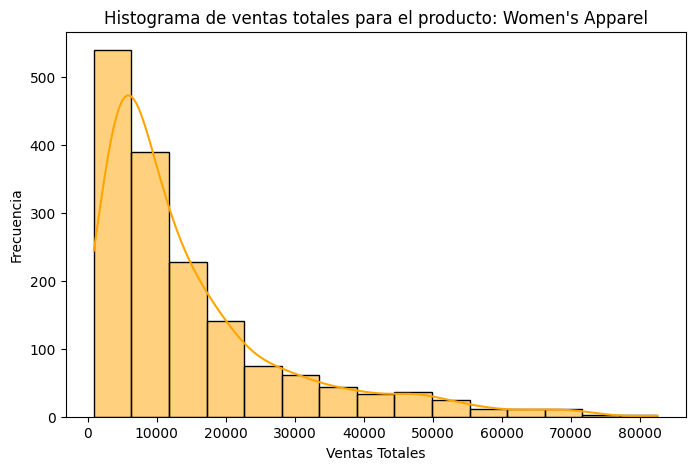

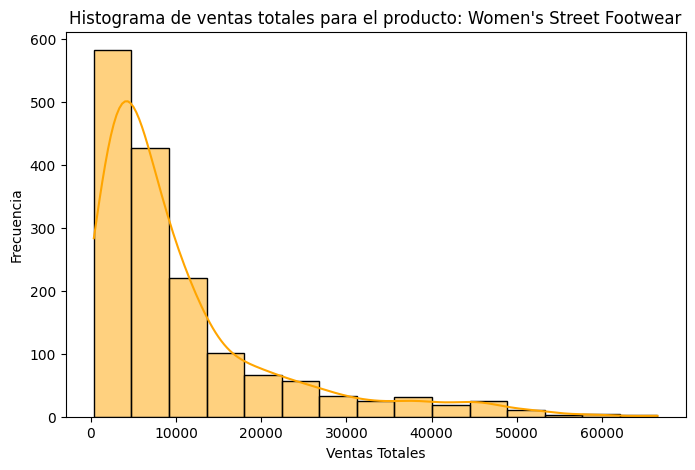

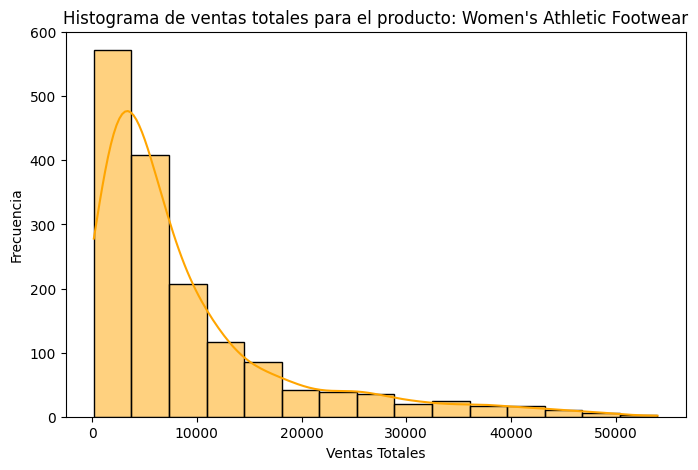

In [30]:
# Crear un histograma donde se representen los precios por unidad 'units_sold' y agruparlo por 'product'
products = df['product'].unique()

for product in products:
    subset = df[df['product'] == product]
    plt.figure(figsize=(8, 5))
    sns.histplot(subset['total_sales'], bins=15, kde=True, color='orange')
    plt.title(f'Histograma de ventas totales para el producto: {product}')
    plt.xlabel('Ventas Totales')
    plt.ylabel('Frecuencia')
    plt.show()